# 6.5. WHR_ Unsupervised Machine Learning_ Clustering

## This script contains the following points:

### 1. Importing Libraries
### 2. Loading and Checking the Data
### 3. Data Manipulations and Reprocessing
### 4. The Elbow Technique
### 5. K-means clustering
### 6. Results and insights

# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
# Ensure the graphs are displayed in your notebook without the need to "call" them specifically

%matplotlib inline

# 2. Loading and Checking the Data

In [3]:
# folder path to my main project folder is now stored within variable 'path'

path = r'/Users/pau/10-06-2024 World Happiness Report'

#### Importing the “WHR_2019_cleaned.csv” data set into my Jupyter notebook using the os library as df_whr

In [4]:
# using the os.path.join() function to simplify the importing data and create dataframe: whr

df_whr = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','WHR_2019_cleaned.csv'), index_col = False)


In [5]:
# Checking “WHR_2019_cleaned.csv” data is correctly loaded

print(df_whr.head()) # to ensure nothing looks off about our imported dataframes.
print(df_whr.info())
df_whr.shape # to confirm the total size of our imported df

   Unnamed: 0  rank country_or_region  happiness_score  GDP_per_capita  \
0           0     1           Finland            7.769           1.340   
1           1     2           Denmark            7.600           1.383   
2           2     3            Norway            7.554           1.488   
3           3     4           Iceland            7.494           1.380   
4           4     5       Netherlands            7.488           1.396   

   social_support_score  life_expectancy  freedom_score  generosity_score  \
0                 1.587            0.986          0.596             0.153   
1                 1.573            0.996          0.592             0.252   
2                 1.582            1.028          0.603             0.271   
3                 1.624            1.026          0.591             0.354   
4                 1.522            0.999          0.557             0.322   

   corruption_perception_score  
0                        0.393  
1                        0

(156, 10)

# 3. Data Manipulations and Reprocessing

In [6]:
# Select only numeric columns

df_numeric = df_whr.select_dtypes(exclude=['object'])

In [7]:
df_numeric

,Unnamed: 0,rank,happiness_score,GDP_per_capita,social_support_score,life_expectancy,freedom_score,generosity_score,corruption_perception_score
0,0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,151,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,152,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,154,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [8]:
# Standardize data set through Z-score normalization

from sklearn.preprocessing import StandardScaler
scaler_zscore = StandardScaler()
df_scaled = scaler_zscore.fit_transform(df_numeric)

In [9]:
df_scaled

array([[-1.72098328, -1.72098328,  2.12871112, ...,  1.4242823 ,
        -0.33540398,  2.99675712],
       [-1.69877704, -1.69877704,  1.97639663, ...,  1.39627687,
         0.70726491,  3.17715844],
       [-1.67657081, -1.67657081,  1.93493825, ...,  1.47329179,
         0.90737308,  2.4449413 ],
       ...,
       [ 1.67657081,  1.67657081, -1.98648391, ..., -2.74852598,
        -0.28274393, -0.90840093],
       [ 1.69877704,  1.69877704, -2.09463621, ..., -1.17322084,
         0.52822076, -0.8022825 ],
       [ 1.72098328,  1.72098328, -2.30192812, ..., -2.67851242,
         0.18066446, -0.20801932]])

# 4. The Elbow Technique

In [10]:
# Using the Elbow Technique

num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

[-1404.0,
 -782.7037977396487,
 -577.7715506628679,
 -498.0299058558271,
 -437.1096278659383,
 -409.23813736011834,
 -381.0414790287204,
 -346.60568096796857,
 -340.3416647355098]

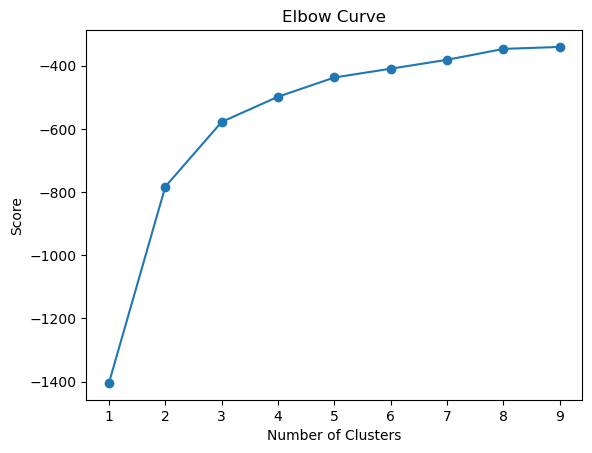

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

# Export the elbow method graph
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'elbow_method_pylab.png') 
pl.savefig(file_name)

pl.show()# Show the plot

### Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart. Explain why you chose that number.

#### Analysis of the Elbow Curve for Optimal Cluster Number

Upon examining the elbow curve generated, a significant leap is observed between 2 and 3 on the x-axis. This significant suggests that the data structure is best captured when divided into three distinct groups. Beyond this point, the curve begins to plateau, indicating that additional clusters do not contribute.

Based on this analysis, I conclude that the optimal number of clusters for this dataset is three. 


# 5. K-means clustering

### Run the K-means Algorithm

In [13]:
# Create the k-means object

kmeans = KMeans(n_clusters = 3)

### Attach cluster labels to the Dataframe

In [14]:
# Fit the k-means object to the data

kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [15]:
df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

In [16]:
# Verify cluster assignment

df_numeric.head()

,Unnamed: 0,rank,happiness_score,GDP_per_capita,social_support_score,life_expectancy,freedom_score,generosity_score,corruption_perception_score,clusters
0,0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1


In [17]:
# Checking frequency of "clusters" variable
df_numeric['clusters'].value_counts()

clusters
1    53
0    52
2    51
Name: count, dtype: int64

In [18]:
# Exporting clustered data as 'clusters.xlsx'

df_numeric.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'clusters.xlsx'), index=False)

### Visualizations of the Clustered Data

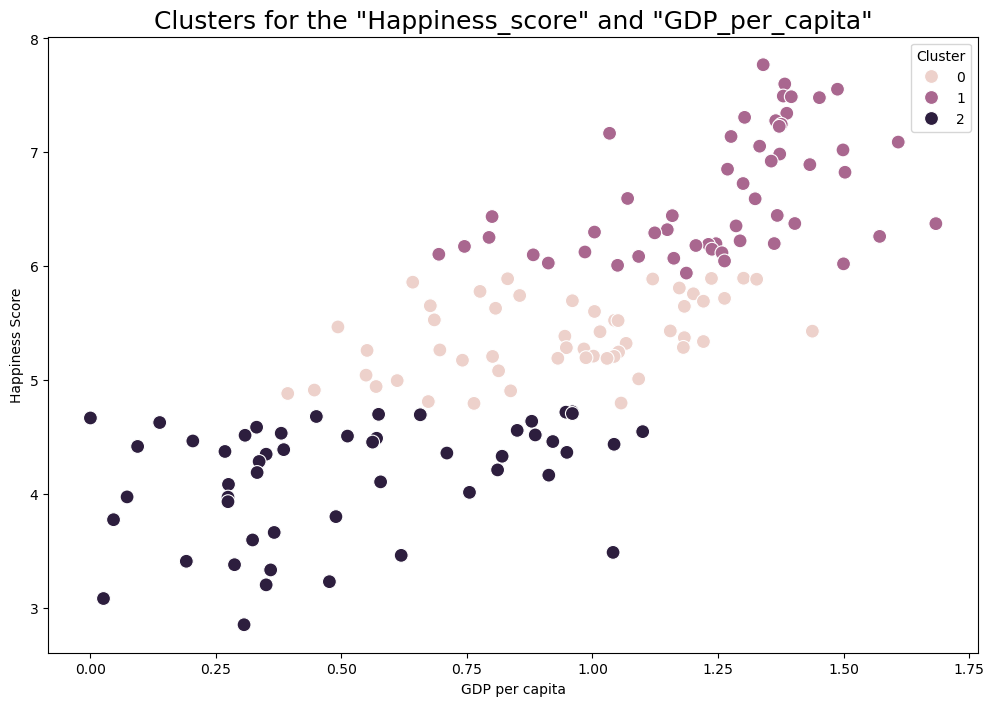

In [19]:
# Plot the clusters for the "Happiness_score" and "GDP_per_capita" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['GDP_per_capita'], y=df_numeric['happiness_score'], hue=kmeans.labels_, s=100) 
# Here, I am subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.

plt.title('Clusters for the "Happiness_score" and "GDP_per_capita"', fontsize = 18) # add a title)
plt.xlabel('GDP per capita') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.legend(title='Cluster')

# Export the scatterplot of clusters
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'Happiness_GDP_kmeans_clustering.png')
plt.savefig(file_name)

plt.show()


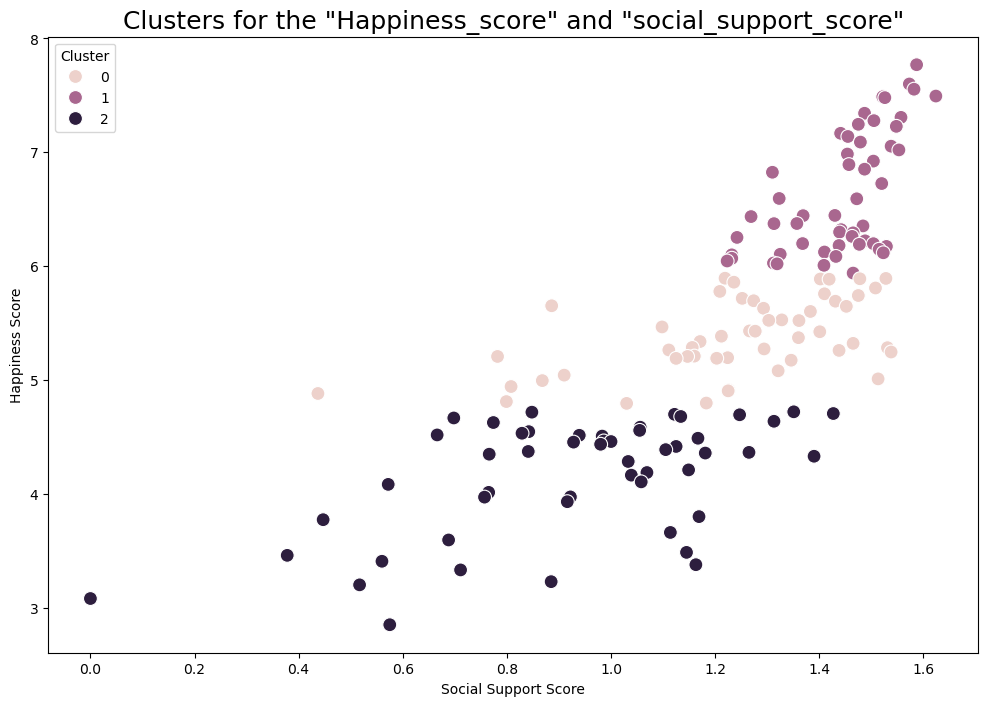

In [20]:
# Plot the clusters for the "happiness_score" and "social_support_score" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['social_support_score'], y=df_numeric['happiness_score'], hue=kmeans.labels_, s=100)
ax.grid(False) # This removes the grid from the background.

plt.title('Clusters for the "Happiness_score" and "social_support_score"', fontsize = 18) # add a title)
plt.xlabel('Social Support Score') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.legend(title='Cluster')

# Export the scatterplot of clusters
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'Happiness_social_support_kmeans_clustering.png')
plt.savefig(file_name)

plt.show()

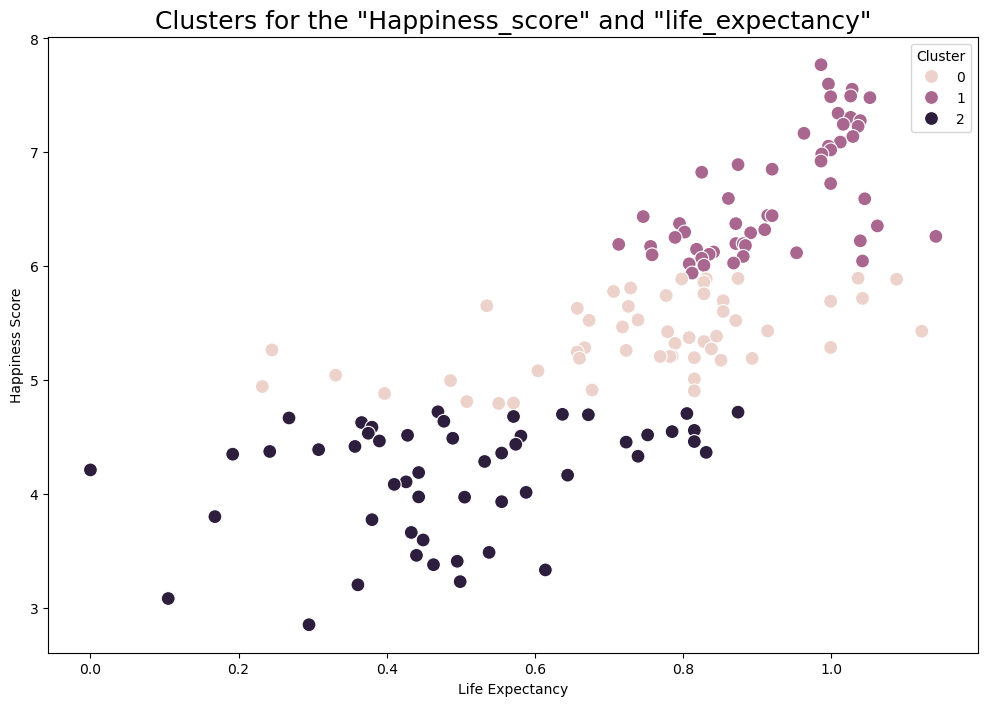

In [21]:
# Plot the clusters for the "happiness_score" and "life_expectancy" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['life_expectancy'], y=df_numeric['happiness_score'], hue=kmeans.labels_, s=100)
ax.grid(False) 

plt.title('Clusters for the "Happiness_score" and "life_expectancy"', fontsize = 18) # add a title)
plt.xlabel('Life Expectancy') 
plt.ylabel('Happiness Score') 
plt.legend(title='Cluster')

# Export the scatterplot of clusters
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'Happiness_life_expectancy_kmeans_clustering.png')
plt.savefig(file_name)

plt.show()

### Calculate Descriptive Statistics for Clusters using the groupby() function

In [22]:
df_numeric.loc[df_numeric['clusters'] == 2, 'cluster'] = 'dark purple'
df_numeric.loc[df_numeric['clusters'] == 1, 'cluster'] = 'purple'
df_numeric.loc[df_numeric['clusters'] == 0, 'cluster'] = 'pink'

In [23]:
df_numeric.groupby('cluster').agg({'GDP_per_capita':['mean', 'median'], 
                         'social_support_score':['mean', 'median'], 
                         'life_expectancy':['mean', 'median'],
                          'happiness_score':['mean', 'median']})

GDP_per_capita        social_support_score        life_expectancy  \
                      mean median                 mean median            mean   
cluster                                                                         
dark purple       0.515843  0.450             0.934314  0.983        0.495216   
pink              0.935077  0.985             1.239846  1.270        0.748442   
purple            1.250396  1.294             1.442509  1.465        0.923830   

                    happiness_score         
             median            mean median  
cluster                                     
dark purple  0.4770        4.157922  4.360  
pink         0.7835        5.384288  5.356  
purple       0.9200        6.631509  6.436

# 6. Results and insights

### Discuss your findings of the descriptive statistics for clusters 

#### The clusters seem to exhibit distinct characteristics based on the mean and median values of various features.

1. **Dark Purple Cluster:**
   - This cluster has relatively lower GDP per capita, social support score, and life expectancy compared to the other clusters.
   - The happiness score is also lower, indicating that countries in this cluster tend to have lower overall well-being.
   - These characteristics suggest that countries in this cluster might be experiencing economic challenges, lower social cohesion, and potentially poorer health outcomes.

2. **Pink Cluster:**
   - The GDP per capita, social support score, and life expectancy in this cluster are notably higher compared to the dark purple cluster.
   - The happiness score is significantly higher as well, indicating that countries in this cluster tend to have higher overall well-being.
   - These features suggest that countries in this cluster are likely to be more affluent, with stronger social support systems and better health outcomes, contributing to higher levels of happiness.

3. **Purple Cluster:**
   - This cluster falls between the dark purple and pink clusters in terms of GDP per capita, social support score, and life expectancy.
   - The happiness score also falls in between, suggesting moderate levels of overall well-being for countries in this cluster.
   - These characteristics indicate that countries in this cluster may have a mix of economic, social, and health indicators, resulting in a moderate level of happiness.

Overall, the clusters seem to align with expectations based on the features analyzed. However, further exploration and validation may be necessary to ensure the robustness of the clustering results.

### Propose what these results could be useful for in future steps of an analytics pipeline.

#### These clustered results can be highly beneficial for various aspects of an analytics pipeline:

1. **Policy Decision Making:**
   - Utilize cluster characteristics to drive targeted economic and social policies. For instance, boosting economic development in the Dark Purple cluster while enhancing healthcare and social programs in the Pink cluster".

2. **Resource Allocation:**
   - Allocate resources effectively by targeting interventions where they are needed most. For example, direct health resources to improve life expectancy in lower-performing clusters.

3. **Policy Development:**
   - Develop specific policies that address the unique challenges of each cluster. Economic policies to stimulate growth in the Dark Purple and Pink clusters, and perhaps happiness-enhancing social policies for the Purple cluste.

4. **Monitoring and Evaluation:**
   - Establish benchmarks based on these statistics for ongoing monitoring of the effectiveness of interventions and policies.

5. **Targeted Advertising and Messaging:**
   - Leverage insights from the cluster analysis to design advertising campaigns that speak directly to the unique needs and aspirations of the population segments within each cluster. For the Dark Purple cluster, marketing campaigns might focus on affordable products and services that enhance quality of life, while for the affluent Purple cluster, premium brands could advertise luxury goods and services that align with a higher disposable income and pursuit of happiness. This approach ensures that the messaging is not only relevant but also timely, increasing engagement and conversion rates.
   - These strategies, rooted in a deep understanding of cluster-specific characteristics, not only help in crafting more effective marketing messages but also in enhancing the overall impact of policy interventions and social programs by ensuring that they are communicated in the most resonant and accessible manner. By integrating these insights into the broader analytics pipeline, stakeholders can drive more nuanced, data-driven decision-making that aligns with both economic objectives and community well-being.

6. **Further Research and Analysis:**
- Investigate underlying causes of disparities between clusters. Use the data as a baseline for deeper, causative studies and to track changes over times, with data of other years.
- Overall, these clustered results provide valuable insights that can guide decision-making processes, resource allocation strategies, and targeted interventions aimed at improving the well-being of populations across different regions of the world.